# Air scattering
==============================================================


- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017

In [70]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [71]:
from astropy.constants import N_A,R,g0
from astropy import units as u

In [72]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [73]:
PlotFigFlag=True

# Initialisation

## Constants

In [74]:
M_air= 28.965338*u.g/u.mol
M_air_dry=28.9644*u.g/u.mol
M_h2o=18.016*u.g/u.mol

In [75]:
P0=101325.*u.Pa;   # /*!< Pa : pressure at see level */
T0=288.15*u.K;   #/*!< sea level temperature */  
L=0.0065*u.K/u.m  # refroidissement en fonction de l'altitude

## Functions

### Adiabatic definition

Si $T(h)=T_0$ était constant par rapport à l'altitude, alors

\begin{eqnarray}
\frac{dP(h)}{dz} & = & - \rho(h) \cdot g \\
\rho(h) & = & \frac{M}{RT_0}\cdot P(h)
\end{eqnarray}

Alors la dépendance de la pression avec l'altitude devient:
\begin{equation}
P(h)=P_0 \exp(- \frac{gM}{RT_0}h)
\end{equation}

où $P_0= $101325 Pa, $T_0=$288.15 K,  au niveau de la mer (on peut prendre un autre niveau de référence comme celui de l'altitude.

( $g=$9.80665~m/s$^2$, $M=$0.0289644 kg/mol molar mass of dry air, $R=$8.31447~J/(mol.K) : universal gas constant). 

In [76]:
def Pressure_adiab(altitude):
    """
    Pressure( double altitude)
    Provide the pressure at the altitude.
    Attention, ici on considère de l'air sec.
    
    - Input : altitude : input altitude in meters
    - Output :pressure  : output pressure in Pa SI 
    """
    h=altitude
    P=P0*np.exp(-((g0*M_air_dry)/(R*T0))*h)
    return P  

### Pressure other definition

- $p_0 = $ sea level standard atmospheric pressure, 101.325 kPa
- $T_0 = $ sea level standard temperature, 288.15 K
- $g = $  earth-surface gravitational acceleration, 9.80665 m/s2
- $ L = $ temperature lapse rate, 0.0065 K/m (troposphere)
- $ R = $  ideal (universal) gas constant, 8.31447 J/(mol·K)
- $ M = $ molar mass of dry air, 0.0289644 kg/mol

Temperature at altitude $h$ meters above sea level is approximated by the following formula (only valid inside the troposphere):

$$
T = T_0 - L h 
$$

The pressure at altitude  $h$ is given by:
$$
   p = p_0 \left(1 - \frac{L h}{T_0} \right)^\frac{g M}{R L}
$$

Density can then be calculated according to a molar form of the ideal gas law:
$$
    \rho = \frac{p M}{R T}  
$$

where:

- $ M  = $ molar mass
- $ R  = $ ideal gas constant
- $ T  = $ absolute temperature
- $ p  = $ absolute pressure 

In [77]:
def Pressure(h):
    P=P0*np.exp(g0*M_air_dry/R/L*np.log(1-L*h/T0))
    return P

In [78]:
alt=np.linspace(0,20,100)*u.km
pres_adiab=Pressure_adiab(alt)
pres=Pressure(alt)

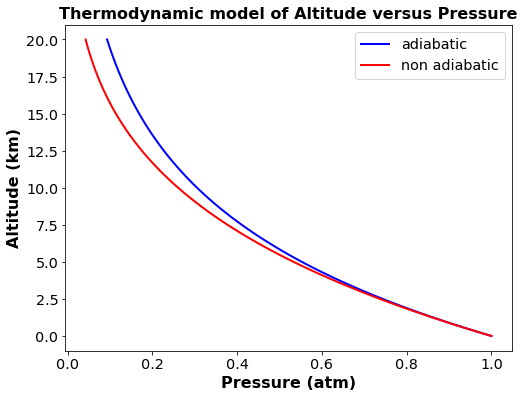

In [79]:
plt.plot(pres_adiab/P0,alt,'b-',lw=2,label='adiabatic')
plt.plot(pres/P0,alt,'r-',lw=2,label='non adiabatic')
plt.title('Thermodynamic model of Altitude versus Pressure',fontweight="bold",fontsize=16)
plt.xlabel('Pressure (atm)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.legend()
if PlotFigFlag:
    plt.savefig('altvspressure.png')

### Altitude versus pressure et tempetature versus h

$$
\begin{eqnarray}
 h & = & \frac{T_0}{L} \left(\left( \frac{P}{P_0}\right)^{\frac{RL}{gM}} -1  \right) \\
 T & = & T_0\left(2- \left( \frac{P}{P_0} \right)^{\frac{RL}{gM}} \right) \\
 \rho & = & \frac{P(h)M}{RT(h)}
\end{eqnarray} 
$$

###  the atmospheric column depth $X$:
\begin{equation}
X(h,\theta)= P(h)/\cos \theta
\end{equation}


In [80]:
def XDepth(altitude,costh=1):
    """
    Function : XDepth(altitude,costh)
      Provide the column depth in gr / cm^2 equivalent of airmass in physical units
    - Input :  altitude : input altitude in meters
    - Input :  costh    : input cosimus of zenith angle 
    - Output :  XDepth  : output column depth in gr per cm squared
    """
    h=altitude
    XD=Pressure(h)/g0/costh
    return XD

In [81]:
def XDepth_adiab(altitude,costh=1):
    """
    Function : XDepth(altitude,costh)
      Provide the column depth in gr / cm^2 equivalent of airmass in physical units
    - Input :  altitude : input altitude in meters
    - Input :  costh    : input cosimus of zenith angle 
    - Output :  XDepth  : output column depth in gr per cm squared
    """
    h=altitude
    XD=Pressure_adiab(h)/g0/costh
    return XD

In [82]:
XD_adiab=XDepth_adiab(alt)
XD=XDepth(alt)

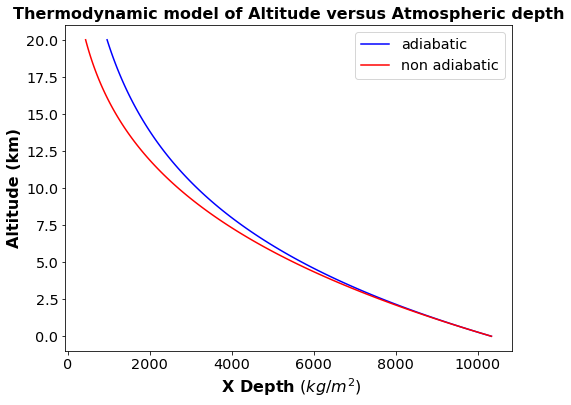

In [83]:
plt.plot(XD_adiab,alt,'b-',label='adiabatic')
plt.plot(XD,alt,'r-',label='non adiabatic')
plt.title('Thermodynamic model of Altitude versus Atmospheric depth',fontweight="bold",fontsize=16)
plt.xlabel(' X Depth $(kg/m^2)$',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.legend()
if PlotFigFlag:
    plt.savefig('altvsdepth.png')

## Rayleigh Optical Depth

One can compute with a fairly good accuracy (much better than the calibration errors) the optical depth from LOWTRAN7~:

$$
\left\{
\begin{array} {c c c}
OD_{rayl}& =& \frac{X(h,\theta)}{3102 g/cm^2 } \left( \frac{400 nm}{\lambda}\right)^4  \frac{1}{ 1-0.0722\left(\frac{400nm}{\lambda}\right)^2} \\
OD_{rayl}& =& \frac{X(h,\theta)}{2770 g/cm^2 } \left( \frac{400 nm}{\lambda}\right)^4 
\end{array}
\right.
$$

The air transparency is given by $T=e^{-OD_{rayl}}$.

It has been checked that Rayleigh attenuation in $LibRadTran$ obeys exactly this attenuation.  

In [84]:
def RayOptDepth(wavelength, altitude=0*u.m, costh=1):
    """
    Function RayOptDepth(double wavelength, double altitude, double costh)

    Provide Rayleigh optical depth
         
    - Input  wavelength : input wavelength in nm
    - Input  altitude : input altitude in meters
    - Input   costh    : input cosimus of zenith angle 
    - Output  OptDepth  : output optical depth no unit, for Rayleigh
    """

    h=altitude

    A=(XDepth(h,costh)/(3102.*u.g/(u.cm*u.cm)))
    B=np.exp(-4.*np.log(wavelength/(400.*u.nm)))  
    C= 1-0.0722*np.exp(-2*np.log(wavelength/(400.*u.nm)))

    OD=A*B/C
        
    #double OD=XDepth(altitude,costh)/2970.*np.power((wavelength/400.),-4);

    return OD

In [85]:
def RayOptDepth_adiab(wavelength, altitude=0*u.m, costh=1):
    """
    Function RayOptDepth(double wavelength, double altitude, double costh)

    Provide Rayleigh optical depth
         
    - Input  wavelength : input wavelength in nm
    - Input  altitude : input altitude in meters
    - Input   costh    : input cosimus of zenith angle 
    - Output  OptDepth  : output optical depth no unit, for Rayleigh
    """

    h=altitude

    A=(XDepth_adiab(h,costh)/(3102.*u.g/(u.cm*u.cm)))
    B=np.exp(-4.*np.log(wavelength/(400.*u.nm)))  
    C= 1-0.0722*np.exp(-2*np.log(wavelength/(400.*u.nm)))

    OD=A*B/C
        
    #double OD=XDepth(altitude,costh)/2970.*np.power((wavelength/400.),-4);

    return OD

In [86]:
wavelength=np.linspace(200.,1100.,100)*u.nm

In [87]:
od=RayOptDepth(wavelength)
od_adiab=RayOptDepth_adiab(wavelength)

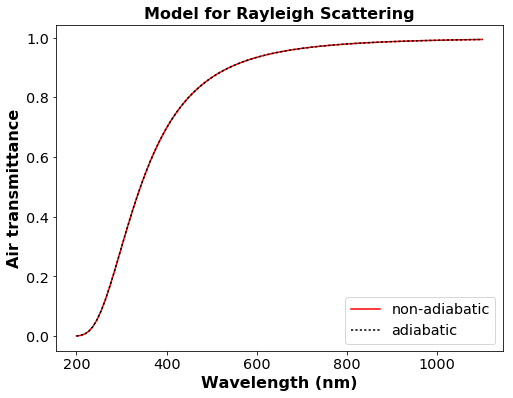

In [88]:
plt.plot(wavelength,np.exp(-od),'r-',label='non-adiabatic')
plt.plot(wavelength,np.exp(-od_adiab),'k:',label='adiabatic')
plt.title('Model for Rayleigh Scattering',fontweight="bold",fontsize=16)
plt.xlabel('Wavelength (nm)',fontweight="bold",fontsize=16)
plt.ylabel('Air transmittance',fontweight="bold",fontsize=16)
plt.legend()
if PlotFigFlag:
    plt.savefig('transmissionvswl_adiab.png')

In [89]:
def RayOptDepth2(wavelength, altitude=0*u.m, costh=1):
    """
    Function RayOptDepth2(wavelength, altitude, costh)

    Provide Rayleigh optical depth
    - Input wavelength : input wavelength in nm
    - Input altitude : input altitude in meters
    - Input costh    : input cosimus of zenith angle 
    - Output OptDepth  : optical depth no unit
    
    """
    h=altitude
    A=XDepth(h,costh)/(2770.*u.g/(u.cm*u.cm))
    B=np.exp(-4*np.log(wavelength/(400.*u.nm)))
    OD=A*B         
  
    return OD

In [90]:
def RayOptDepth2_adiab(wavelength, altitude=0*u.m, costh=1):
    """
    Function RayOptDepth2_adiab(wavelength, altitude, costh)
    Provide Rayleigh optical depth
    - Input wavelength : input wavelength in nm
    - Input altitude : input altitude in meters
    - Input costh    : input cosimus of zenith angle 
    - Output OptDepth  : optical depth no unit
    
    """
    h=altitude
    A=XDepth_adiab(h,costh)/(2770.*u.g/(u.cm*u.cm))
    B=np.exp(-4*np.log(wavelength/(400.*u.nm)))
    OD=A*B         
  
    return OD

In [91]:
wavelength=np.linspace(200.,1100.,100)*u.nm
od=RayOptDepth(wavelength)
od_adiab=RayOptDepth_adiab(wavelength)
od2=RayOptDepth2(wavelength)

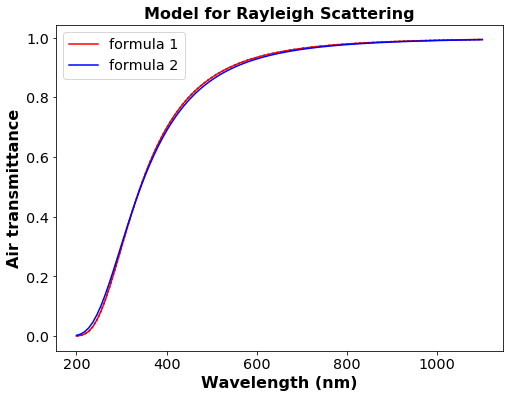

In [92]:
plt.plot(wavelength,np.exp(-od_adiab),'k:')
plt.plot(wavelength,np.exp(-od),'r-',label='formula 1')
plt.plot(wavelength,np.exp(-od2),'b-',label='formula 2')
plt.title('Model for Rayleigh Scattering',fontweight="bold",fontsize=16)
plt.xlabel('Wavelength (nm)',fontweight="bold",fontsize=16)
plt.ylabel('Air transmittance',fontweight="bold",fontsize=16)
plt.legend()
if PlotFigFlag:
    plt.savefig('transmissionvswl_model.png')

## Aerosols models

La profondeur optique des aérosols $\tau_{AOD}$ peut être paramétrisée au plus simple par la formule:

$$
\tau_{AOD}  =  \tau_{aer}(\lambda_0) \left(\frac{\lambda_0}{\lambda}\right)^\alpha 
$$

In [93]:
def AeroOptDepth(wavelength,tau_aerosols_500=0.10,alpha_ang=1) :
    """
    AeroOptDepth(wavelength, alpha)

    Provide Aerosols optical depth
    - Input : wavelength : input wavelength in nm
    - Input : alpha : Angstrom exponent
    - Output : OptDepth  : output optical depth no unit for aerosols
    
    """

    OD=tau_aerosols_500*np.exp(-alpha_ang*np.log(wavelength/(500*u.nm)))
    return OD

In [94]:
AOD=AeroOptDepth(wavelength)

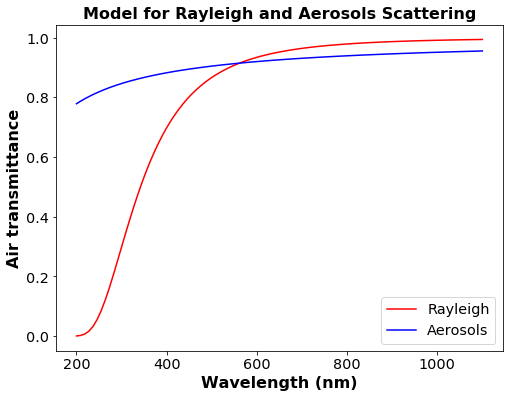

In [95]:
plt.plot(wavelength,np.exp(-od),'r-',label='Rayleigh')
plt.plot(wavelength,np.exp(-AOD),'b-',label='Aerosols')
plt.title('Model for Rayleigh and Aerosols Scattering',fontweight="bold",fontsize=16)
plt.xlabel('Wavelength (nm)',fontweight="bold",fontsize=16)
plt.ylabel('Air transmittance',fontweight="bold",fontsize=16)
plt.legend()
if PlotFigFlag:
    plt.savefig('transmissionvswl_rayaer.png')